## **Tree-based feature selection**

In [1]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y = True)

In [2]:
X.shape

(150, 4)

In [3]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_ 

array([0.08542932, 0.06001819, 0.36755401, 0.48699848])

In [4]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

(150, 2)

## Trying with other data set

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv("mobile_data.csv")

In [7]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
X = data.iloc[:,0:20] 
y = data.iloc[:,-1]

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [10]:
print(model.feature_importances_)

[0.06013501 0.02028147 0.03422056 0.01994729 0.03264028 0.01633626
 0.03551678 0.03372598 0.03691605 0.03464526 0.0342271  0.0469432
 0.04734108 0.39174403 0.03334166 0.03447911 0.03500239 0.01391383
 0.01766608 0.0209766 ]


In [11]:
# mapping the scores to the column names ans sorting in decending order
scores = pd.Series(model.feature_importances_)
scores.index = X.columns
scores.sort_values(ascending = False)

ram              0.391744
battery_power    0.060135
px_width         0.047341
px_height        0.046943
mobile_wt        0.036916
int_memory       0.035517
talk_time        0.035002
n_cores          0.034645
sc_w             0.034479
pc               0.034227
clock_speed      0.034221
m_dep            0.033726
sc_h             0.033342
fc               0.032640
wifi             0.020977
blue             0.020281
dual_sim         0.019947
touch_screen     0.017666
four_g           0.016336
three_g          0.013914
dtype: float64

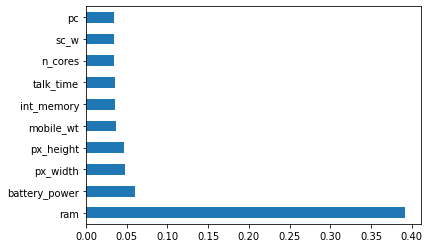

In [12]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()